# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>
### Exercise 02.1

The integral $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ was computed via Monte Carlo using two different form of sampling: a uniform distribution in $[0,1)$ and a non-uniform distribution still in $[0,1)$ to implement the importance sampling technique.

#### Uniform Distribution

The integral was estimated by the usual Monte Carlo method: generate a number uniformly between the extremes of the integral; evaluate the integrand in that point; repeat many times adding each value obtained; divide the result by the times the integrand was evaluated.
The uncertainty was calculated using the blocks method.

#### Importance Sampling

The method of Importance Sampling is useful to lower the standard deviation by sampling the points not according to a uniform distribution, but to a distribution which is similar to the integrand one wishes to evaluate. It is possible to rewrite the original integral $I=\int_a^b g(x)p(x)dx$ by multiplying and dividing by a probability distribution $r(x)$, obtaining $I=\int_a^b [\frac{g(x)p(x)}{r(x)}]r(x)dx $ with $r(x)\ge0$ $\forall x$ and $\int r(x) dx =1$. Then the estimation of the integral follows the Monte Carlo method using the new $r(x$) distribution function to generate the numbers and evaluatingthe new integrand each time. 

The function chosen as the probability distribution for the importance sampling was the most intuitive one, the linearization of the integrand in the interval $[0,1)$. After normalization the equation of this straight line is $y = 2 (1 - x)$, and by the method of the inversion of the cumulative numbers can be generated with this distribution using $$x = 1 - \sqrt{1-y}$$ with $y$ uniformly distributed in $[0,1)$. In the code $x = 1 - \sqrt{y}$ was used as it is distributed identically as long as $y \in [0,1)$ and it requires one less calculation for each generated number, although it is an easy one.

The uncertainty was once again calculated using the blocks method.

#### Difference between the two methods

Both methods evaluate the integral correctly within their relative uncertainties, but the uncertainty of the Importance Sampling method is about one order of magnitude smaller than the one of the Uniform Distribution, all other variables used in the computation being equal.

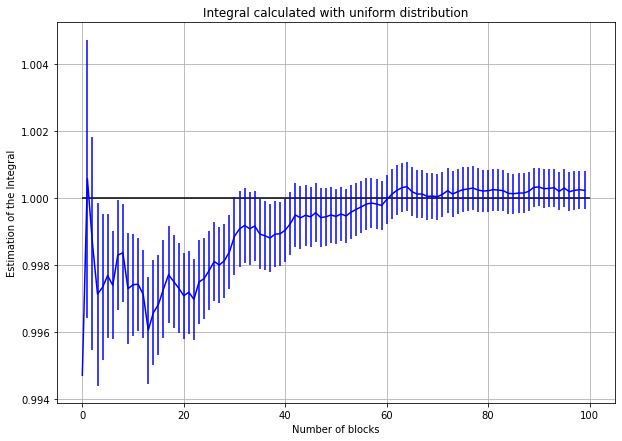

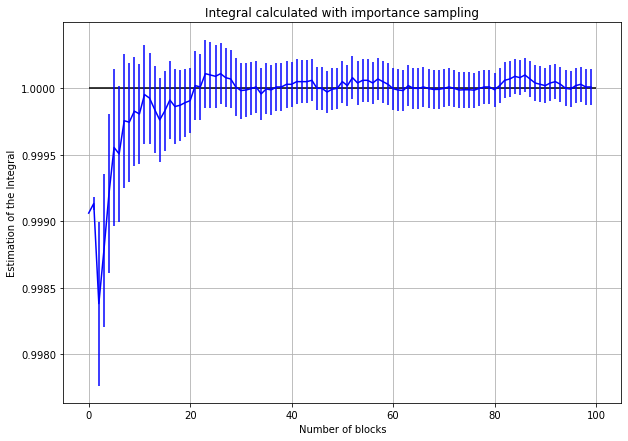

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#With uniform distribution
x,y,err=np.loadtxt("Int_unif.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))

plt.hlines(1, 0, 100, color = 'black')
plt.errorbar(x,y,yerr=err, color = 'b')
plt.xlabel('Number of blocks')
plt.ylabel("Estimation of the Integral")
plt.title("Integral calculated with uniform distribution")
plt.grid(True)

#With importance sampling
x_imp,y_imp,err_imp=np.loadtxt("Int_imp.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))

plt.hlines(1, 0, 100, color = 'black')
plt.errorbar(x_imp,y_imp,yerr=err_imp, color = 'b')
plt.xlabel('Number of blocks')
plt.ylabel("Estimation of the Integral")
plt.title("Integral calculated with importance sampling")
plt.grid(True)

plt.show()

### Exercise 02.2

The aim is to find $\sqrt{<|\vec r_N|^2>}$ for a random walk, first on a 3D lattice and then on the continuum. The steps are of length one in both cases. The random walk where simulated $10^5$ times, with the squared distance from the centre being saved for every step. The uncertainty was evaluated using the block method to find the SD of $|\vec r_N|^2$ and it was then propagated to find $\sigma \sqrt{<|\vec r_N|^2>}$ . The plots show $\sqrt{<|\vec r_N|^2>}$ as a function of the step.

#### 3D Lattice

For the 3D lattice the direction taken at each step was randomized by generating a number $x \in [0,6)$ and associating at each subset of length one each one of the three axis in either the positive or negative direction. The result is then compared with a curve of the form $f(step)=k\sqrt{step}$, which is tipical of a diffusive behaviour, which is in agreement with the simulation. 

#### Continuum

To uniformly sample a direction in the continuum it is equivalent to uniformly sample a solid angle, which in spherical coordinates is equivalent to sample $\theta \in [0,\pi]$ and $\phi[0,2\pi]$. The distributions of these two angles aren't uniform though, but can be found inverting the cumulative function. From $d\Omega = \sin{\theta} d\theta d\phi$ and the probability being normalized to 1 we have $N\int_0^{2\pi}d\phi \int_0^\pi \sin{\theta} d\theta = 1$, where $N$ is the normalization factor which in this case amounts to $\frac{1}{4\pi}$.
Then the dipendence of the cumulative on $\phi$ alone is $F(\phi) = \frac{\phi}{2\pi}$, and inverting it:

$$\phi = 2 \pi x,\; \; \; \; \; \; \; \; \; \; \; \; \; \;\;\; \; \; \;\; \; \; \; \; \; \; \; \; \; x \in [0,1]$$

For $\theta$ the cumulative is $F(\theta) = \frac{1 - \cos \theta}{2}$, so inverting it we obtain:

$$\theta = \arccos(1 - 2 y), \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; y \in [0,1]$$

The result is again compared with a curve of the form $f(step)=k\sqrt{step}$. It is fitting with the simulation within the uncertainty. 

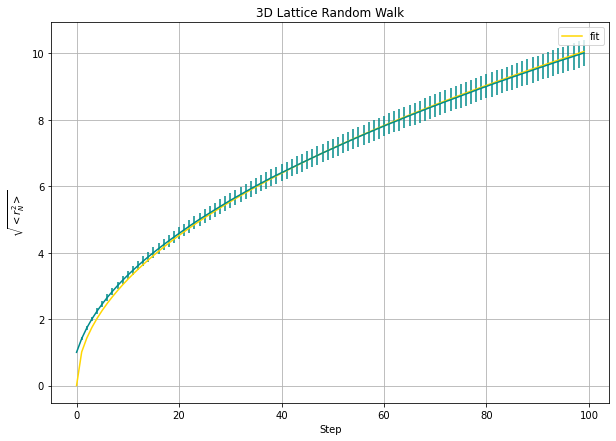

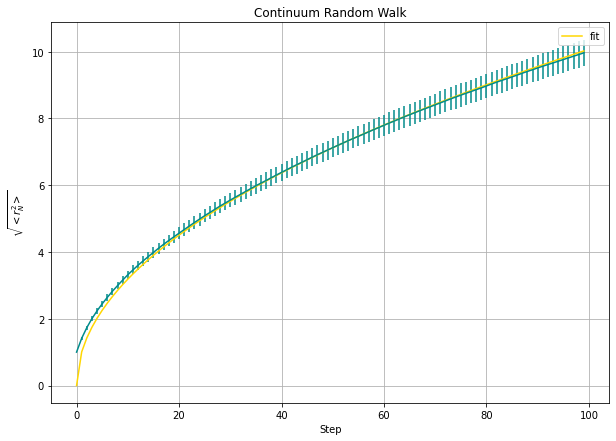

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit


#On 3D lattice

def fit(x,a):
    return a*np.sqrt(x);

x_lat,y_lat,err_lat=np.loadtxt("Lattice.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))

plt.errorbar(x_lat,y_lat,yerr=err_lat, color = 'darkcyan')
plt.xlabel('Step')
plt.ylabel('$\sqrt{<r_N^2>}$')
plt.title("3D Lattice Random Walk")
plt.grid(True)

p_opt_lat, p_cov_lat = curve_fit(fit, x_lat, y_lat)
walk_fit_lat = fit(x_lat,p_opt_lat)
plt.plot(x_lat,walk_fit_lat, color = 'gold', label = 'fit')
plt.legend()

#Continuous case
x_con,y_con,err_con=np.loadtxt("Continuum.dat", usecols=(0, 1, 2), unpack=True)

fig=plt.figure(figsize=(10, 7))

plt.errorbar(x_con,y_con,yerr=err_con, color = 'darkcyan')
plt.xlabel('Step')
plt.ylabel('$\sqrt{<r_N^2>}$')
plt.title("Continuum Random Walk")
plt.grid(True)

p_opt_con, p_cov_con = curve_fit(fit, x_con, y_con)
walk_fit_con = fit(x_con,p_opt_con)
plt.plot(x_con,walk_fit_con, color = 'gold', label = 'fit')
plt.legend()

plt.show()